# Session 18 : Addtional Exercise - Raghunath

### Problem Statement
    Given the following data set, use the sklearn package to find the co-efficients of the
    line that describes the following relationships:
        1) x1 and y
        2) x2 and y
        3) x3 and y
    Also, plot the line and the data using matplotlib and report the co-efficient of
    determination for the lines using the metrics library.
<img src="dataset.png" size="500px"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x1 = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1]
x2 = [37.8, 39.3, 45.9, 41.3, 10.8,48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24, 35.1, 7.6, 32.9]
x3 = [69.2, 45.1, 69.3, 58.5, 58.4, 75, 23.5, 11.6, 1, 21.2, 24.2, 4, 65.9, 7.2, 46]
target = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7, 19]
print(len(x1))
print(len(x2))
print(len(x3))
print(len(target))

15
15
15
15


In [3]:
correlation = pd.DataFrame(columns=['x1','x2', 'x3', 'target'])

In [4]:
correlation["x1"]=x1
correlation["x2"]=x2
correlation["x3"]= x3
correlation["target"] = target

In [5]:
correlation

,x1,x2,x3,target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


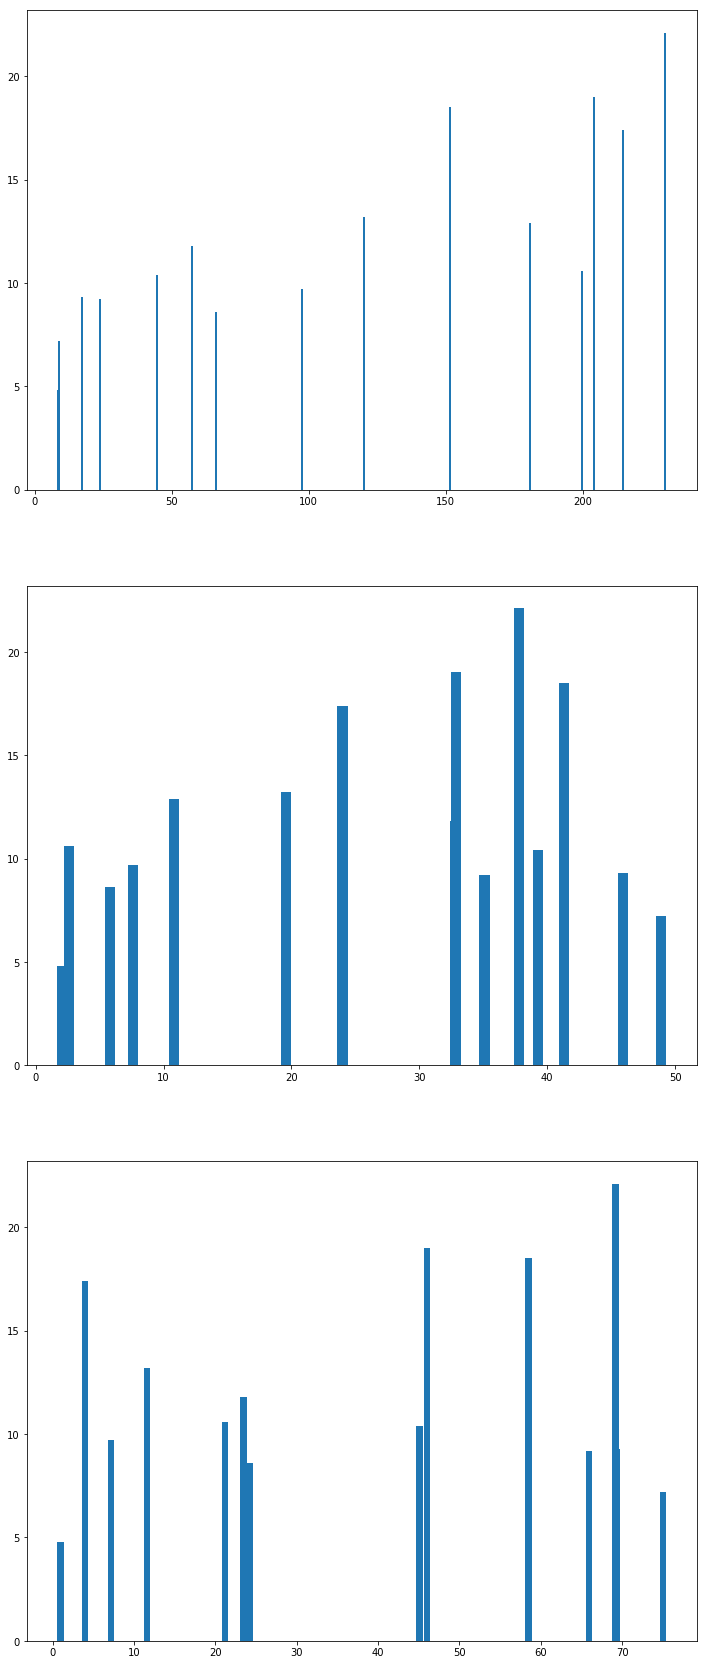

In [6]:
fig, axes = plt.subplots(3, figsize=(12,30))

axes[0].bar(x1, target)
axes[1].bar(x2, target)
axes[2].bar(x3, target)
plt.show()

In [7]:
corr = correlation.corr()
corr.style.background_gradient(cmap='coolwarm')

,x1,x2,x3,target
x1,1,-0.179161,-0.0830697,0.828446
x2,-0.179161,1,0.736396,0.301945
x3,-0.0830697,0.736396,1,0.199612
target,0.828446,0.301945,0.199612,1


In [8]:
corr['target']

x1        0.828446
x2        0.301945
x3        0.199612
target    1.000000
Name: target, dtype: float64

In [9]:
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [10]:
X = correlation.drop("target", axis=1)

In [11]:
y = correlation["target"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

(0, 20)

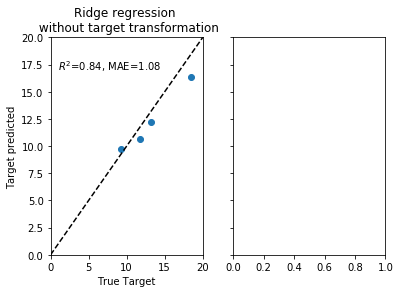

In [13]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0.scatter(y_test, y_pred)
ax0.plot([0, 20], [0, 20], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Ridge regression \n without target transformation')
ax0.text(1, 17, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax0.set_xlim([0, 20])
ax0.set_ylim([0, 20])

(0, 20)

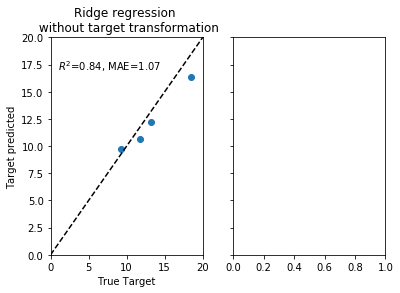

In [14]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)
y_pred = lin_regr.predict(X_test)

ax0.scatter(y_test, y_pred)
ax0.plot([0, 20], [0, 20], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Ridge regression \n without target transformation')
ax0.text(1, 17, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax0.set_xlim([0, 20])
ax0.set_ylim([0, 20])